# Proyecto de Predicción de Abandono del Tratamiento de Tuberculosis

**Autor:** Cristian Daniel Ccopa Acero

**Curso:** Aprendizaje Supervisado

## Descripción del Proyecto
Este proyecto tiene como objetivo predecir el abandono del tratamiento de tuberculosis utilizando un modelo de clasificación basado en **XGBoost**. El modelo está entrenado con un conjunto de datos que incluye variables socioeconómicas, demográficas y de comportamiento de pacientes, con el fin de identificar patrones que puedan predecir si un paciente abandonará su tratamiento o no.

### Variables Consideradas
Las variables utilizadas en el modelo incluyen, entre otras:
- **Edad, sexo y procedencia**: Información demográfica de los pacientes.
- **Ingreso económico y tipo de vivienda**: Factores socioeconómicos que podrían influir en el comportamiento del paciente.
- **Historial de síntomas y tratamiento**: Incluye detalles sobre la duración del tratamiento, efectos secundarios experimentados, entre otros.
- **Comportamiento de salud**: Consumo de alcohol, tabaco y otros hábitos de vida.

## Objetivo
El objetivo principal es desarrollar un modelo predictivo que ayude a identificar a los pacientes con mayor riesgo de abandonar el tratamiento, permitiendo intervenciones tempranas para mejorar la adherencia al tratamiento de tuberculosis.

## Resultados del Modelo
- **Precisión en el entrenamiento**: 1.0 (El modelo clasifica perfectamente los datos de entrenamiento).
- **Precisión en el conjunto de prueba**: 0.9 (El modelo muestra una buena capacidad de generalización, aunque con algunos errores en la predicción de ciertas clases).

## Análisis de la Matriz de Confusión
Se utilizaron matrices de confusión para evaluar el desempeño del modelo en ambos conjuntos de datos (entrenamiento y prueba). Los resultados indican una buena clasificación de las clases principales, pero con algunos **falsos negativos** en la predicción de la clase "Abandone".

## Próximos Pasos
- Ajuste de hiperparámetros para mejorar la precisión general.
- Análisis de casos mal clasificados, especialmente en la clase "Abandone una vez", para mejorar la clasificación.
- Implementación de técnicas adicionales de validación y pruebas cruzadas.

In [139]:
import pandas as pd

# Cargar los datos
df = pd.read_excel("datos-mary.xlsx", header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,NaN,NaN,NaN,FACTORES FAMILIARES,NaN,NaN,FACTORES ECONOMICOS,NaN,FACTORES RELACIONADOS CON EL TRATAMIENTO,NaN,...,NaN,FACTORES INSTITUCIONALES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,edad,sexo,procedencia,con quien vive,cuantas personas vive en casa,fuerza emocional,actividad laboral,ingreso economico,hace cuanto tiempo tiene la tb,sabe cuanto dura el tratamiento,...,con que frecuencia,"sospecha, conocia que tenia la tb",lugar de diagnostico d ela tb,que otro apoyo recibes,primera visita como trato el personal,"normalmente, cual es el trato del personal",recibe visitas domiciliarias,quien realiza la visita domiciliaria,en cuanto al horario,que se deberia hacer para continuar con el tra...
2,27,F,urbana,pareja,2,ninguno,cachuelos,menos 500,6 meses,si,...,ocasionalmente,sospechaba,minsa,alimentos,amable,amable,frecuentemente,tecnica enfermeria,adecuado,NaN
3,50,M,urbana,solo,2,centro salud,obrero,menos 500,4 meses,si,...,NaN,otro malestar,minsa,alimentos,amable,amable,nunca,NaN,no es adecuado,NaN
4,47,M,urbana,"esposa, hijos",4,familia,no trabajo,menos 500,6 meses,si,...,NaN,otro malestar,minsa,NaN,amable,amable,nunca,NaN,adecuado,NaN


#### Borramos la primera fila

In [140]:
df = df.drop(0, axis=0).reset_index(drop=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,edad,sexo,procedencia,con quien vive,cuantas personas vive en casa,fuerza emocional,actividad laboral,ingreso economico,hace cuanto tiempo tiene la tb,sabe cuanto dura el tratamiento,...,con que frecuencia,"sospecha, conocia que tenia la tb",lugar de diagnostico d ela tb,que otro apoyo recibes,primera visita como trato el personal,"normalmente, cual es el trato del personal",recibe visitas domiciliarias,quien realiza la visita domiciliaria,en cuanto al horario,que se deberia hacer para continuar con el tra...
1,27,F,urbana,pareja,2,ninguno,cachuelos,menos 500,6 meses,si,...,ocasionalmente,sospechaba,minsa,alimentos,amable,amable,frecuentemente,tecnica enfermeria,adecuado,NaN
2,50,M,urbana,solo,2,centro salud,obrero,menos 500,4 meses,si,...,NaN,otro malestar,minsa,alimentos,amable,amable,nunca,NaN,no es adecuado,NaN
3,47,M,urbana,"esposa, hijos",4,familia,no trabajo,menos 500,6 meses,si,...,NaN,otro malestar,minsa,NaN,amable,amable,nunca,NaN,adecuado,NaN
4,22,M,rural,padre y madre,4,familia,estudiante,entre 751 - 1000,6 meses,si,...,NaN,otro malestar,Essalud,alimentos,amable,indiferente,frecuentemente,otro profesional,adecuado,NaN


#### Establecer la primera fila como las columnas

In [141]:
df.columns = df.iloc[0]
df.head()

,edad,sexo,procedencia,con quien vive,cuantas personas vive en casa,fuerza emocional,actividad laboral,ingreso economico,hace cuanto tiempo tiene la tb,sabe cuanto dura el tratamiento,...,con que frecuencia,"sospecha, conocia que tenia la tb",lugar de diagnostico d ela tb,que otro apoyo recibes,primera visita como trato el personal,"normalmente, cual es el trato del personal",recibe visitas domiciliarias,quien realiza la visita domiciliaria,en cuanto al horario,que se deberia hacer para continuar con el tratamiento
0,edad,sexo,procedencia,con quien vive,cuantas personas vive en casa,fuerza emocional,actividad laboral,ingreso economico,hace cuanto tiempo tiene la tb,sabe cuanto dura el tratamiento,...,con que frecuencia,"sospecha, conocia que tenia la tb",lugar de diagnostico d ela tb,que otro apoyo recibes,primera visita como trato el personal,"normalmente, cual es el trato del personal",recibe visitas domiciliarias,quien realiza la visita domiciliaria,en cuanto al horario,que se deberia hacer para continuar con el tra...
1,27,F,urbana,pareja,2,ninguno,cachuelos,menos 500,6 meses,si,...,ocasionalmente,sospechaba,minsa,alimentos,amable,amable,frecuentemente,tecnica enfermeria,adecuado,NaN
2,50,M,urbana,solo,2,centro salud,obrero,menos 500,4 meses,si,...,NaN,otro malestar,minsa,alimentos,amable,amable,nunca,NaN,no es adecuado,NaN
3,47,M,urbana,"esposa, hijos",4,familia,no trabajo,menos 500,6 meses,si,...,NaN,otro malestar,minsa,NaN,amable,amable,nunca,NaN,adecuado,NaN
4,22,M,rural,padre y madre,4,familia,estudiante,entre 751 - 1000,6 meses,si,...,NaN,otro malestar,Essalud,alimentos,amable,indiferente,frecuentemente,otro profesional,adecuado,NaN


In [142]:
df = df.drop(0, axis=0).reset_index(drop=True)
df.head()

,edad,sexo,procedencia,con quien vive,cuantas personas vive en casa,fuerza emocional,actividad laboral,ingreso economico,hace cuanto tiempo tiene la tb,sabe cuanto dura el tratamiento,...,con que frecuencia,"sospecha, conocia que tenia la tb",lugar de diagnostico d ela tb,que otro apoyo recibes,primera visita como trato el personal,"normalmente, cual es el trato del personal",recibe visitas domiciliarias,quien realiza la visita domiciliaria,en cuanto al horario,que se deberia hacer para continuar con el tratamiento
0,27,F,urbana,pareja,2,ninguno,cachuelos,menos 500,6 meses,si,...,ocasionalmente,sospechaba,minsa,alimentos,amable,amable,frecuentemente,tecnica enfermeria,adecuado,NaN
1,50,M,urbana,solo,2,centro salud,obrero,menos 500,4 meses,si,...,NaN,otro malestar,minsa,alimentos,amable,amable,nunca,NaN,no es adecuado,NaN
2,47,M,urbana,"esposa, hijos",4,familia,no trabajo,menos 500,6 meses,si,...,NaN,otro malestar,minsa,NaN,amable,amable,nunca,NaN,adecuado,NaN
3,22,M,rural,padre y madre,4,familia,estudiante,entre 751 - 1000,6 meses,si,...,NaN,otro malestar,Essalud,alimentos,amable,indiferente,frecuentemente,otro profesional,adecuado,NaN
4,53,F,rural,"esposa, hijos",4,familia,comerciante,menos 500,6 meses,si,...,NaN,otro malestar,minsa,alimentos,indiferente,indiferente,nunca,NaN,no es adecuado,NaN


In [143]:
# Conteo de valores faltantes
df.isnull().sum()

0
edad                                                       0
sexo                                                       0
procedencia                                                0
con quien vive                                             0
cuantas personas vive en casa                              0
fuerza emocional                                           0
actividad laboral                                          0
ingreso economico                                          0
hace cuanto tiempo tiene la tb                             0
sabe cuanto dura el tratamiento                            0
conoce cuantas pastillas debe tomar al dia                 0
suministran suficientes medicamentos                       0
 molestias ha sentido en el transcurso del tratamiento     0
dejo de tomar el tratamiento por estas molestias           0
abandono el tratamiento                                    0
condicion de vivienda                                      0
material de la viviend

#### Eliminamos las variables que faltan bastantes datos

In [144]:
columnas_a_eliminar = ['hace cuanto tiempo', 'que tipo de drogas', 'con que frecuencia', 'quien realiza la visita domiciliaria', 'que se deberia hacer para continuar con el tratamiento']

# Eliminar las columnas
df = df.drop(columns=columnas_a_eliminar)

df.head()

,edad,sexo,procedencia,con quien vive,cuantas personas vive en casa,fuerza emocional,actividad laboral,ingreso economico,hace cuanto tiempo tiene la tb,sabe cuanto dura el tratamiento,...,fuma,consume drogas,consume bebidas alcoholicas,"sospecha, conocia que tenia la tb",lugar de diagnostico d ela tb,que otro apoyo recibes,primera visita como trato el personal,"normalmente, cual es el trato del personal",recibe visitas domiciliarias,en cuanto al horario
0,27,F,urbana,pareja,2,ninguno,cachuelos,menos 500,6 meses,si,...,no,no,si,sospechaba,minsa,alimentos,amable,amable,frecuentemente,adecuado
1,50,M,urbana,solo,2,centro salud,obrero,menos 500,4 meses,si,...,no,no,no,otro malestar,minsa,alimentos,amable,amable,nunca,no es adecuado
2,47,M,urbana,"esposa, hijos",4,familia,no trabajo,menos 500,6 meses,si,...,no,no,no,otro malestar,minsa,NaN,amable,amable,nunca,adecuado
3,22,M,rural,padre y madre,4,familia,estudiante,entre 751 - 1000,6 meses,si,...,no,no,no,otro malestar,Essalud,alimentos,amable,indiferente,frecuentemente,adecuado
4,53,F,rural,"esposa, hijos",4,familia,comerciante,menos 500,6 meses,si,...,no,no,no,otro malestar,minsa,alimentos,indiferente,indiferente,nunca,no es adecuado


In [145]:
df.isnull().sum()

0
edad                                                      0
sexo                                                      0
procedencia                                               0
con quien vive                                            0
cuantas personas vive en casa                             0
fuerza emocional                                          0
actividad laboral                                         0
ingreso economico                                         0
hace cuanto tiempo tiene la tb                            0
sabe cuanto dura el tratamiento                           0
conoce cuantas pastillas debe tomar al dia                0
suministran suficientes medicamentos                      0
 molestias ha sentido en el transcurso del tratamiento    0
dejo de tomar el tratamiento por estas molestias          0
abandono el tratamiento                                   0
condicion de vivienda                                     0
material de la vivienda               

In [146]:
# Asumiendo que 'df' es tu dataframe original
variables_influentes = [
    'edad', 'sexo', 'procedencia', 'con quien vive', 'ingreso economico',
    'hace cuanto tiempo tiene la tb', 'sabe cuanto dura el tratamiento', 
    'conoce cuantas pastillas debe tomar al dia', ' molestias ha sentido en el transcurso del tratamiento', 
    'dejo de tomar el tratamiento por estas molestias', 'abandono el tratamiento', 
    'condicion de vivienda', 'material de la vivienda', 'tipo de piso de su vivienda', 
    'cuantas habitaciones', 'servicios basicos', 'tipo de transporte', 'fuma', 
    'consume bebidas alcoholicas', 'sospecha, conocia que tenia la tb', 
    'lugar de diagnostico d ela tb', 'primera visita como trato el personal', 
    'normalmente, cual es el trato del personal', 'recibe visitas domiciliarias', 
    'en cuanto al horario',
]


# Filtrar el DataFrame original con solo las columnas necesarias
df = df[variables_influentes]

# Verificar el DataFrame resultante
df.head()


,edad,sexo,procedencia,con quien vive,ingreso economico,hace cuanto tiempo tiene la tb,sabe cuanto dura el tratamiento,conoce cuantas pastillas debe tomar al dia,molestias ha sentido en el transcurso del tratamiento,dejo de tomar el tratamiento por estas molestias,...,servicios basicos,tipo de transporte,fuma,consume bebidas alcoholicas,"sospecha, conocia que tenia la tb",lugar de diagnostico d ela tb,primera visita como trato el personal,"normalmente, cual es el trato del personal",recibe visitas domiciliarias,en cuanto al horario
0,27,F,urbana,pareja,menos 500,6 meses,si,si,dolor cabeza,no,...,"agua, desague, luz",micro,no,si,sospechaba,minsa,amable,amable,frecuentemente,adecuado
1,50,M,urbana,solo,menos 500,4 meses,si,si,"nauseas, ardor estomago",si,...,"agua, desague, luz",a pie,no,no,otro malestar,minsa,amable,amable,nunca,no es adecuado
2,47,M,urbana,"esposa, hijos",menos 500,6 meses,si,si,"ardor estomago, picazon",no,...,luz,a pie,no,no,otro malestar,minsa,amable,amable,nunca,adecuado
3,22,M,rural,padre y madre,entre 751 - 1000,6 meses,si,si,"nauseas, vomitos, ardos estomacal",no,...,luz,moto taxi,no,no,otro malestar,Essalud,amable,indiferente,frecuentemente,adecuado
4,53,F,rural,"esposa, hijos",menos 500,6 meses,si,si,"ardor estomago, picazon",si,...,"agua, desague, luz",micro,no,no,otro malestar,minsa,indiferente,indiferente,nunca,no es adecuado


In [147]:
df.isnull().sum()

0
edad                                                      0
sexo                                                      0
procedencia                                               0
con quien vive                                            0
ingreso economico                                         0
hace cuanto tiempo tiene la tb                            0
sabe cuanto dura el tratamiento                           0
conoce cuantas pastillas debe tomar al dia                0
 molestias ha sentido en el transcurso del tratamiento    0
dejo de tomar el tratamiento por estas molestias          0
abandono el tratamiento                                   0
condicion de vivienda                                     0
material de la vivienda                                   0
tipo de piso de su vivienda                               0
cuantas habitaciones                                      0
servicios basicos                                         0
tipo de transporte                    

In [148]:
df_clean = df

In [149]:
df_clean.head()

,edad,sexo,procedencia,con quien vive,ingreso economico,hace cuanto tiempo tiene la tb,sabe cuanto dura el tratamiento,conoce cuantas pastillas debe tomar al dia,molestias ha sentido en el transcurso del tratamiento,dejo de tomar el tratamiento por estas molestias,...,servicios basicos,tipo de transporte,fuma,consume bebidas alcoholicas,"sospecha, conocia que tenia la tb",lugar de diagnostico d ela tb,primera visita como trato el personal,"normalmente, cual es el trato del personal",recibe visitas domiciliarias,en cuanto al horario
0,27,F,urbana,pareja,menos 500,6 meses,si,si,dolor cabeza,no,...,"agua, desague, luz",micro,no,si,sospechaba,minsa,amable,amable,frecuentemente,adecuado
1,50,M,urbana,solo,menos 500,4 meses,si,si,"nauseas, ardor estomago",si,...,"agua, desague, luz",a pie,no,no,otro malestar,minsa,amable,amable,nunca,no es adecuado
2,47,M,urbana,"esposa, hijos",menos 500,6 meses,si,si,"ardor estomago, picazon",no,...,luz,a pie,no,no,otro malestar,minsa,amable,amable,nunca,adecuado
3,22,M,rural,padre y madre,entre 751 - 1000,6 meses,si,si,"nauseas, vomitos, ardos estomacal",no,...,luz,moto taxi,no,no,otro malestar,Essalud,amable,indiferente,frecuentemente,adecuado
4,53,F,rural,"esposa, hijos",menos 500,6 meses,si,si,"ardor estomago, picazon",si,...,"agua, desague, luz",micro,no,no,otro malestar,minsa,indiferente,indiferente,nunca,no es adecuado


In [ ]:
# df_clean.to_excel('datosMary_limpia.xlsx', index=False)

In [150]:
# Lista de las columnas que contienen variables binarias
binary_columns = ['sabe cuanto dura el tratamiento', 'conoce cuantas pastillas debe tomar al dia', 
                  'dejo de tomar el tratamiento por estas molestias', 'fuma', 'consume bebidas alcoholicas',
                  ]

# Codificando variables binarias (sí/no o 1/0) como 0 y 1
for col in binary_columns:
    df_clean[col] = df_clean[col].map({'si': 1, 'no': 0, 'sí': 1, 'no': 0}).fillna(df_clean[col])

# Codificando las variables con más de dos categorías comenzando desde 1
categorical_columns = ['sexo', 'procedencia', 'con quien vive', 'abandono el tratamiento', 'material de la vivienda', 
                       'tipo de piso de su vivienda', 'servicios basicos', 'tipo de transporte', 
                       'sospecha, conocia que tenia la tb', 'lugar de diagnostico d ela tb', 'primera visita como trato el personal', 
                       'normalmente, cual es el trato del personal', 'recibe visitas domiciliarias', 'en cuanto al horario']

# Usando .factorize() para codificar con valores numéricos comenzando desde 1
for col in categorical_columns:
    df_clean[col] = pd.factorize(df_clean[col])[0] + 1  # +1 para que comience desde 1

# Si tienes alguna otra variable que también sea categórica, agrega a 'categorical_columns' y repite el proceso.

# Guardar el dataframe limpio en un archivo Excel
df_clean = df_clean


In [151]:
df_clean.head()

,edad,sexo,procedencia,con quien vive,ingreso economico,hace cuanto tiempo tiene la tb,sabe cuanto dura el tratamiento,conoce cuantas pastillas debe tomar al dia,molestias ha sentido en el transcurso del tratamiento,dejo de tomar el tratamiento por estas molestias,...,servicios basicos,tipo de transporte,fuma,consume bebidas alcoholicas,"sospecha, conocia que tenia la tb",lugar de diagnostico d ela tb,primera visita como trato el personal,"normalmente, cual es el trato del personal",recibe visitas domiciliarias,en cuanto al horario
0,27,1,1,1,menos 500,6 meses,1,1,dolor cabeza,0,...,1,1,0,1,1,1,1,1,1,1
1,50,2,1,2,menos 500,4 meses,1,1,"nauseas, ardor estomago",1,...,1,2,0,0,2,1,1,1,2,2
2,47,2,1,3,menos 500,6 meses,1,1,"ardor estomago, picazon",0,...,2,2,0,0,2,1,1,1,2,1
3,22,2,2,4,entre 751 - 1000,6 meses,1,1,"nauseas, vomitos, ardos estomacal",0,...,2,3,0,0,2,2,1,2,1,1
4,53,1,2,3,menos 500,6 meses,1,1,"ardor estomago, picazon",1,...,1,1,0,0,2,1,2,2,2,2


In [152]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 25 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   edad                                                    50 non-null     object
 1   sexo                                                    50 non-null     int64 
 2   procedencia                                             50 non-null     int64 
 3   con quien vive                                          50 non-null     int64 
 4   ingreso economico                                       50 non-null     object
 5   hace cuanto tiempo tiene la tb                          50 non-null     object
 6   sabe cuanto dura el tratamiento                         50 non-null     int64 
 7   conoce cuantas pastillas debe tomar al dia              50 non-null     int64 
 8    molestias ha sentido en el transcurso del tratamien

In [153]:
# Convertir las columnas que están como 'object' a numéricas
# 1. Codificación de variables con más de dos categorías: usamos 'factorize' para convertirlas en números
categorical_columns = ['ingreso economico', 'hace cuanto tiempo tiene la tb', 
                       ' molestias ha sentido en el transcurso del tratamiento', 
                       'condicion de vivienda', 'cuantas habitaciones']

for col in categorical_columns:
    df_clean[col] = pd.factorize(df_clean[col])[0] + 1  # Aseguramos que los valores empiecen desde 1

# 2. Convertir las columnas que deberían ser numéricas
df_clean['edad'] = pd.to_numeric(df_clean['edad'], errors='coerce')  # Convertir edad a numérico
df_clean['cuantas habitaciones'] = pd.to_numeric(df_clean['cuantas habitaciones'], errors='coerce')  # Convertir 'cuantas habitaciones' a numérico

# 3. Si hay alguna columna que contiene texto dentro de 'molestias ha sentido en el transcurso del tratamiento' y quieras codificarlo:
# Puedes usar map o factorize, como este ejemplo:
df_clean[' molestias ha sentido en el transcurso del tratamiento'] = df_clean[' molestias ha sentido en el transcurso del tratamiento'].map({
    'dolor cabeza': 1, 'nauseas, ardor estomago': 2, 'ardor estomago, picazon': 3,
    'nauseas, vomitos, ardos estomacal': 4, 'otro malestar': 5
}).fillna(0).astype(int)

# Verifica los tipos de datos después de la conversión
print(df_clean.dtypes)

0
edad                                                      int64
sexo                                                      int64
procedencia                                               int64
con quien vive                                            int64
ingreso economico                                         int64
hace cuanto tiempo tiene la tb                            int64
sabe cuanto dura el tratamiento                           int64
conoce cuantas pastillas debe tomar al dia                int64
 molestias ha sentido en el transcurso del tratamiento    int32
dejo de tomar el tratamiento por estas molestias          int64
abandono el tratamiento                                   int64
condicion de vivienda                                     int64
material de la vivienda                                   int64
tipo de piso de su vivienda                               int64
cuantas habitaciones                                      int64
servicios basicos                     

In [154]:
df_clean.head()

,edad,sexo,procedencia,con quien vive,ingreso economico,hace cuanto tiempo tiene la tb,sabe cuanto dura el tratamiento,conoce cuantas pastillas debe tomar al dia,molestias ha sentido en el transcurso del tratamiento,dejo de tomar el tratamiento por estas molestias,...,servicios basicos,tipo de transporte,fuma,consume bebidas alcoholicas,"sospecha, conocia que tenia la tb",lugar de diagnostico d ela tb,primera visita como trato el personal,"normalmente, cual es el trato del personal",recibe visitas domiciliarias,en cuanto al horario
0,27,1,1,1,1,1,1,1,0,0,...,1,1,0,1,1,1,1,1,1,1
1,50,2,1,2,1,2,1,1,0,1,...,1,2,0,0,2,1,1,1,2,2
2,47,2,1,3,1,1,1,1,0,0,...,2,2,0,0,2,1,1,1,2,1
3,22,2,2,4,2,1,1,1,0,0,...,2,3,0,0,2,2,1,2,1,1
4,53,1,2,3,1,1,1,1,0,1,...,1,1,0,0,2,1,2,2,2,2


In [155]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 25 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   edad                                                    50 non-null     int64
 1   sexo                                                    50 non-null     int64
 2   procedencia                                             50 non-null     int64
 3   con quien vive                                          50 non-null     int64
 4   ingreso economico                                       50 non-null     int64
 5   hace cuanto tiempo tiene la tb                          50 non-null     int64
 6   sabe cuanto dura el tratamiento                         50 non-null     int64
 7   conoce cuantas pastillas debe tomar al dia              50 non-null     int64
 8    molestias ha sentido en el transcurso del tratamiento  50 non

## Dividir los datos en características (X) y variable objetivo (y)

In [156]:
# Variables predictoras
X = df_clean.drop('abandono el tratamiento', axis=1)

# Variable objetivo
y = df_clean['abandono el tratamiento']

### Dividir los datos en conjunto de entrenamiento y prueba

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
print(y_train.unique())

[2 3 1 4]


In [159]:
y_train = y_train - 1  # Resta 1 a todas las clases
y_test = y_test - 1    # También aplica la misma transformación en el conjunto de prueba

## Entrenar el modelo XGBoost

In [160]:
import xgboost as xgb

# Crear el modelo XGBoost
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

# Entrenar el modelo
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

### Ahora visualizamos la importancia de las características

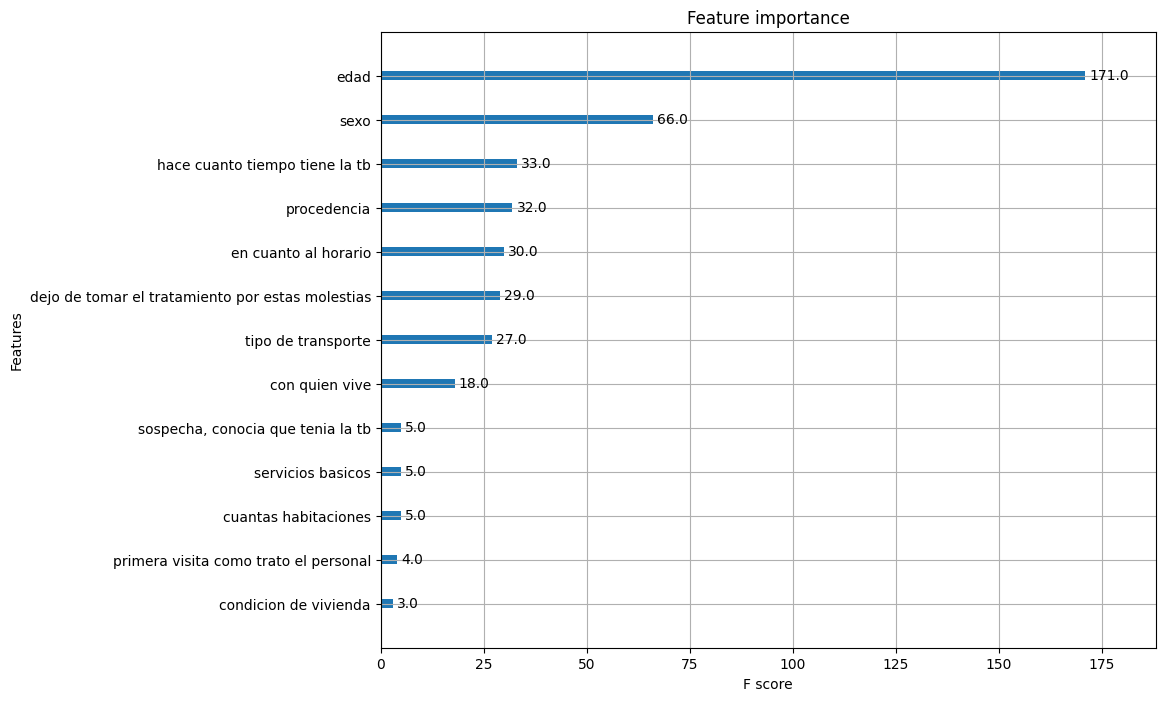

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si lo necesitas
xgb.plot_importance(model, ax=plt.gca())
plt.show()

## Prediccion con nuevos Valores

In [173]:
import pandas as pd
import numpy as np

# Nuevos datos con valores codificados (asegúrate de tener todas las columnas necesarias)
nuevos_datos = {
    'edad': [27, 50, 47, 22, 53],
    'sexo': [1, 2, 2, 2, 1],
    'procedencia': [1, 1, 1, 2, 2],
    'con quien vive': [1, 2, 3, 4, 3],
    'ingreso economico': [1, 1, 1, 2, 1],
    'hace cuanto tiempo tiene la tb': [1, 1, 1, 2, 1],
    'sabe cuanto dura el tratamiento': [1, 1, 1, 1, 1],
    'conoce cuantas pastillas debe tomar al dia': [1, 1, 1, 1, 1],
    ' molestias ha sentido en el transcurso del tratamiento': [0, 0, 0, 0, 0],
    'dejo de tomar el tratamiento por estas molestias': [0, 1, 0, 0, 1],
    'condicion de vivienda': [1, 2, 2, 1, 2],  # Aquí incluimos una columna con valores de ejemplo
    'material de la vivienda': [1, 2, 1, 2, 1],
    'tipo de piso de su vivienda': [1, 2, 1, 1, 2],
    'cuantas habitaciones': [2, 3, 2, 2, 4],
    'servicios basicos': [1, 2, 1, 2, 1],
    'tipo de transporte': [1, 2, 1, 2, 1],
    'fuma': [0, 1, 0, 1, 0],
    'consume bebidas alcoholicas': [1, 0, 1, 0, 1],
    'sospecha, conocia que tenia la tb': [1, 2, 1, 1, 2],
    'lugar de diagnostico d ela tb': [1, 2, 2, 1, 1],
    'primera visita como trato el personal': [1, 2, 2, 1, 1],
    'normalmente, cual es el trato del personal': [1, 2, 2, 1, 1],
    'recibe visitas domiciliarias': [1, 1, 1, 2, 1],
    'en cuanto al horario': [1, 2, 1, 2, 1]
}

# Convertir a un DataFrame
nuevos_datos_df = pd.DataFrame(nuevos_datos)

# Asegúrate de que las columnas estén en el mismo orden que las del modelo entrenado
# Ordenamos las columnas del DataFrame de los nuevos datos
nuevos_datos_df = nuevos_datos_df[model.get_booster().feature_names]

In [174]:
# Realiza la predicción con los nuevos datos
predicciones = model.predict(nuevos_datos_df)

# Muestra las predicciones
print("Predicciones para los nuevos datos:", predicciones)

Predicciones para los nuevos datos: [0 1 0 0 1]


In [ ]:
# Predicciones (suponiendo que el modelo ha devuelto valores como 0, 1, 2)
# Los valores del modelo pueden ser 0, 1 o 2, por lo que los mapearé a sus respectivas categorías
categorias = {0: 'Nunca abandone', 1: 'Abandone', 2: 'Abandone una vez'}

# Convertir las predicciones a las categorías correspondientes
predicciones_categorias = [categorias[pred] for pred in predicciones]

# Crear un DataFrame con los datos originales y las predicciones
nuevos_datos_df['Predicción'] = predicciones_categorias

# Mostrar los datos con las predicciones
tabla_predicciones = nuevos_datos_df[['edad', 'sexo', 'procedencia', 'con quien vive', 'ingreso economico',
                                      'hace cuanto tiempo tiene la tb', 'sabe cuanto dura el tratamiento',
                                      'conoce cuantas pastillas debe tomar al dia', ' molestias ha sentido en el transcurso del tratamiento',
                                      'dejo de tomar el tratamiento por estas molestias', 'condicion de vivienda',
                                      'material de la vivienda', 'tipo de piso de su vivienda', 'cuantas habitaciones',
                                      'servicios basicos', 'tipo de transporte', 'fuma', 'consume bebidas alcoholicas',
                                      'sospecha, conocia que tenia la tb', 'lugar de diagnostico d ela tb',
                                      'primera visita como trato el personal', 'normalmente, cual es el trato del personal',
                                      'recibe visitas domiciliarias', 'en cuanto al horario', 'Predicción']]

# Mostrar la tabla
tabla_predicciones


,edad,sexo,procedencia,con quien vive,ingreso economico,hace cuanto tiempo tiene la tb,sabe cuanto dura el tratamiento,conoce cuantas pastillas debe tomar al dia,molestias ha sentido en el transcurso del tratamiento,dejo de tomar el tratamiento por estas molestias,...,tipo de transporte,fuma,consume bebidas alcoholicas,"sospecha, conocia que tenia la tb",lugar de diagnostico d ela tb,primera visita como trato el personal,"normalmente, cual es el trato del personal",recibe visitas domiciliarias,en cuanto al horario,Predicción
0,27,1,1,1,1,1,1,1,0,0,...,1,0,1,1,1,1,1,1,1,Nunca abandone
1,50,2,1,2,1,1,1,1,0,1,...,2,1,0,2,2,2,2,1,2,Abandone
2,47,2,1,3,1,1,1,1,0,0,...,1,0,1,1,2,2,2,1,1,Nunca abandone
3,22,2,2,4,2,2,1,1,0,0,...,2,1,0,1,1,1,1,2,2,Nunca abandone
4,53,1,2,3,1,1,1,1,0,1,...,1,0,1,2,1,1,1,1,1,Abandone


Training Accuracy: 1.0
Confusion Matrix (Train):
[[20  0  0  0]
 [ 0 13  0  0]
 [ 0  0  6  0]
 [ 0  0  0  1]]


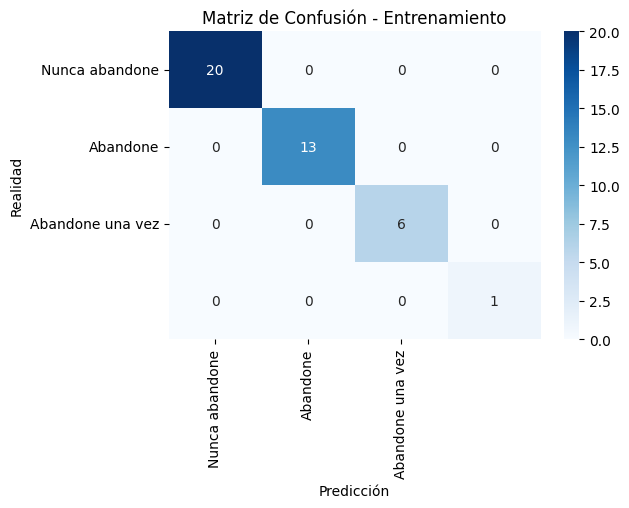

Testing Accuracy: 0.9
Confusion Matrix (Test):
[[4 0 0]
 [0 5 0]
 [0 1 0]]


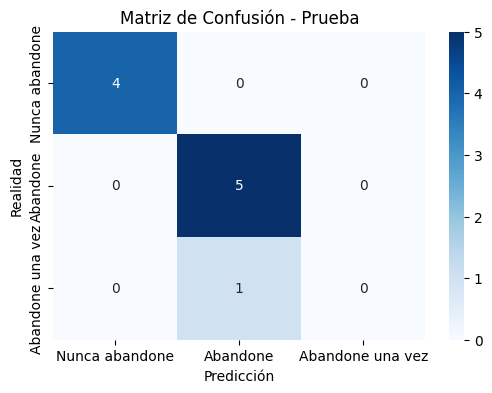

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluación en el conjunto de entrenamiento
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

pred_train = model.predict(X_train)
cm_train = confusion_matrix(y_train, pred_train)
print("Confusion Matrix (Train):")
print(cm_train)

# Visualización de la matriz de confusión para el conjunto de entrenamiento
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Nunca abandone', 'Abandone', 'Abandone una vez'], 
            yticklabels=['Nunca abandone', 'Abandone', 'Abandone una vez'])
plt.title('Matriz de Confusión - Entrenamiento')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Evaluación en el conjunto de prueba
test_accuracy = model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy}")

pred_test = model.predict(X_test)
cm_test = confusion_matrix(y_test, pred_test)
print("Confusion Matrix (Test):")
print(cm_test)

# Visualización de la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Nunca abandone', 'Abandone', 'Abandone una vez'], 
            yticklabels=['Nunca abandone', 'Abandone', 'Abandone una vez'])
plt.title('Matriz de Confusión - Prueba')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


### Interpretación de la matriz de confusión (Entrenamiento):

- Real: Nunca abandone (Primera fila):
    - 20 casos correctamente clasificados como "Nunca abandone".
    - No hay falsos positivos (ningún caso de "Nunca abandone" mal clasificado como otras categorías).
- Real: Abandone (Segunda fila):
    - 13 casos correctamente clasificados como "Abandone".
    - No hay falsos negativos (ningún caso de "Abandone" mal clasificado como "Nunca abandone" o cualquier otra categoría).
- Real: Abandone una vez (Tercera fila):
    - 6 casos correctamente clasificados como "Abandone una vez".
- Real: Otro (Cuarta fila):
    - 1 caso correctamente clasificado en la categoría "Otro".
    - No hay falsos positivos ni falsos negativos.

##### Conclusión sobre el entrenamiento:

- El modelo ha aprendido perfectamente a clasificar los datos de entrenamiento (esto puede ser un signo de sobreajuste).
- No hay errores en la clasificación, todos los valores están en la diagonal.

### Interpretación de la matriz de confusión (Prueba):

- Real: Nunca abandone (Primera fila):
    - 4 casos correctamente clasificados como "Nunca abandone".
    - No hay falsos positivos (ningún caso de "Nunca abandone" mal clasificado como otras categorías).
- Real: Abandone (Segunda fila):
    - 5 casos correctamente clasificados como "Abandone".
    - 1 falso negativo: Un caso de "Abandone" fue clasificado incorrectamente como "Nunca abandone".
- Real: Abandone una vez (Tercera fila):
    - 1 caso mal clasificado como "Nunca abandone". No hay predicciones en la categoría "Abandone una vez".

##### Conclusión sobre la prueba:

- 4 casos de "Nunca abandone" y 5 casos de "Abandone" fueron clasificados correctamente.
- Hay un falso negativo: 1 caso de la clase "Abandone" fue mal clasificado como "Nunca abandone".
- El modelo no predijo correctamente ningún caso de la clase "Abandone una vez", lo cual podría ser un área a mejorar.